# PROYEK SAINS DATA PREDIKSI PRODUKSI PADI KOTA SURABAYA MENGGUNAKAN DATA CUACA UNTUK MENSTABILKAN KETAHANAN PANGAN


# Bisnis Understanding


## 1. Pendahuluan


Dinas ketahanan pangan dan pertanian kota surabaya dengan visi “Gotong Royong Menuju Surabaya Kota Dunia yang Maju, Humanis dan Berkelanjutan”, memiliki misi untuk mendorong terwujudnya ketersediaan dan pola konsumsi pangan yang beragam, bergizi, seimbang dan aman, tentu memiliki banyak tantangan dalam menjaga ketahanan pangan salah satunya masalah produksi.

Aspek ketersediaan pangan berkaitan erat dengan jumlah penduduk di suatu wilayah. Dengan karakteristik wilayah perkotaan yang memiliki penduduk dengan jumlah tinggi dan sektor basis perekonomian berada pada industri dan perdagangan, maka ketergantungan akan distribusi pangan di suatu kota dari daerah disekitarnya sangat tinggi. Kota Surabaya sudah selayaknya memiliki pengaturan ketersediaan pangan tidak hanya berkaitan dengan efisiensi pemanfaatan lahan perkarangan atau sejenisnya namun juga pengaturan distribusi pangan dan kelembagaan yang ada di masyarakat. Berdasarkan data Badan Pusat Statistik Kota Surabaya tahun 2022, disebutkan bahwa jumlah penduduk Kota Surabaya Tahun 2021 sebesar 2,88 juta jiwa dengan laju pertumbuhan sebesar 0,28%. Sementara Pola penggunaan lahan didominasi oleh Kawasan Industri sebesar 9,88%, Kawasan Perumahan dan permukiman, perdagangan dan jasa dll.

Berdasarkan data Pewali Kota surabaya tahun 2023, produksi pangan utama di daerah surabaya berdasarkan data dari tahun 2018- 2023 dicantumkan bahwa tanaman pangan utama yang tersedia di kota surabaya yaitu padi dan jagung, Sementara tantangan yang dihadapi kota surabaya adalah lahan pertanian yang dari tahun ke tahun semakin menyusut dikarenakan banyaknya pembangunan infrastruktur.

Dalam produksi padi, perubahan iklim menjadi salah satu tantangan utama, Fenomena cuaca ekstrem seperti peningkatan suhu, perubahan pola curah hujan, dan durasi penyinaran matahari berdampak pada siklus pertanian dan produktivitas padi, sehingga penentuan musim tanam yang tepat menjadi langkah penting dalam menghadapi perubahan iklim ini, penentuan musim tanam yang tepat menjadi langkah penting dalam menghadapi perubahan iklim ini, Namun, mayoritas petani belum memanfaatkan kalender tanam yang disarankan pemerintah, melainkan lebih mengandalkan pengalaman pribadi untuk menentukan waktu tanam,

Fenomena kerusakan tanaman padi akibat perubahan iklim menunjukkan adanya penentuan waktu penanaman padi yang tepat sehingga produksi padi tetap stabil dan tidak terjadi penurunan produksi yang mengakibatkan ketahanan pangan daerah surabaya menurun.

Pada penelitian ini peneliti lebih membahas pada bidang Data mining. Data mining sendiri merupakan bidang berkembang dari Machine Learning(ML) yang berfokus pada pemanfaatan program untuk membantu manusia belajar dari data, untuk menghasilkan “insight” dari data yang ada sehingga dapat mendatangkan pengetahuan baru.

Percobaan yang dilakukan peneliti adalah dengan melakukan analisis cuaca sebagai estimasi produksi padi, dari latar belakang diatas muncullah ide tentang penggunaan metode prediksi data mining dengan menggunakan library “skicit learn” untuk mengatasi masalah produksi padi.


## 2. Rumusan Masalah


Berdasarkan data dari “Badan Pusat Statistic Nasional” provinsi jawa timur, kota surabaya menjadi kota dengan produksi beras terbawah untuk provinsi jawa timur pada 5 tahun terakhir, sedangkan sumber produksi pangan utama untuk daerah surabaya yaitu padi, yang menyebabkan ketahanan pangan surabaya menurun


## 3. Tujuan dan Manfaat


Adapun tujuan dari proyek sains data ini sebagai berikut :

1. Menerapkan model prediksi berbasis data mining untuk membantu pemerintah kota surabaya dalam optimalisasi produksi padi

Manfaat dari proyek sains data ini yaitu :

1. Dengan prediksi yang akurat, pemerintah surabaya dapat mengalokasikan anggaran secara lebih efektif untuk program-program pertanian, seperti penyediaan bibit unggul, pupuk subsidi, atau pembangunan infrastruktur pertanian.
2. Prediksi dapat membantu pemerintah surabaya mengantisipasi potensi krisis pangan akibat gagal panen atau penurunan produksi.
3. Dengan data prediksi, pemerintah dapat menjaga stabilitas pasokan pangan, sehingga harga pangan daerah surabaya dapat terkendali.


# Pembahasan


# Data Collecting


### Read Data Iklim


disini data iklim secara harian diambil dari data open source BMKG untuk dijadikan seleksi fitur dalam memprediksi produksi beras


saya mengambil data tersebut dikelompokkan berdasarkan tahun terlebih dahulu , lalu dari data excel dibaca dan disatukan ke satu dataframe


data iklim harian ini nanti akan saya jadikan dalam format bulanan untuk mengimbangi data target yang berformat bulanan


In [1]:
import pandas as pd # type: ignore
import glob
import os

# Folder data
folders = ['./2018/', './2019/', './2020/', './2021/', './2022/', './2023/']
data_frames = []
for folder_path in folders:
    file_paths = glob.glob(os.path.join(folder_path, '*.xlsx'))
    for file in file_paths:
        df = pd.read_excel(file, skiprows=8)
        df = df[['Tanggal', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg', 'ddd_car']]
        df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y', errors='coerce')
        df = df.dropna(how='all')
        data_frames.append(df)


combined_df = pd.concat(data_frames, ignore_index=True)
combined_df.set_index('Tanggal', inplace=True)

print(combined_df)




              Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ff_avg ddd_car
Tanggal                                                              
2018-02-01  26.0  30.2  27.5    88.0  13.2  0.4   4.0     1.0      N 
2018-02-02  22.0  33.0  28.3    83.0   2.9  2.4   4.0     2.0      N 
2018-02-03  24.0  32.0  27.1    87.0  32.1  5.3   4.0     2.0      W 
2018-02-04  25.0  33.3  28.9    80.0   8.1  2.0   3.0     2.0      NW
2018-02-05  26.0  33.8  28.7    78.0   0.3  7.8   5.0     2.0      W 
...          ...   ...   ...     ...   ...  ...   ...     ...     ...
2023-01-28   NaN  30.0  25.9    90.0   6.1  1.2   6.0     4.0      NW
2023-01-29  25.0  32.8  27.4    82.0  11.5  0.0  10.0     2.0      NW
2023-01-30  25.4  34.0  29.1    80.0   3.8  4.6   7.0     3.0      NW
2023-01-31  26.4  34.2  28.9    80.0   NaN  1.6  13.0     4.0      NW
2023-02-01  25.6  32.4  28.2    78.0  13.2  2.8   7.0     2.0      NW

[2231 rows x 9 columns]


# Data Understanding


bisa dilihat data diatas adalah data harian dari 6 tahun sebanyak 2231 data


disini ada data ddd_car yaitu arah angin, saya mencoba melihat apakah ini akan dibutuhkan, karena termasuk data kategorical


disini juga di data ada data 8888 dan 999 dimana didalam website bmkg dijelaskan bahwa data 8888 itu data tidak bisa diambil, dan 999 itu data kosong (tidak diambil) maka saya akan mengubah data tersebut menjadi NAN


In [2]:
import numpy as np # type: ignore
combined_df.replace([9999, 8888], np.nan, inplace=True)


### Visualiasi Data iklim


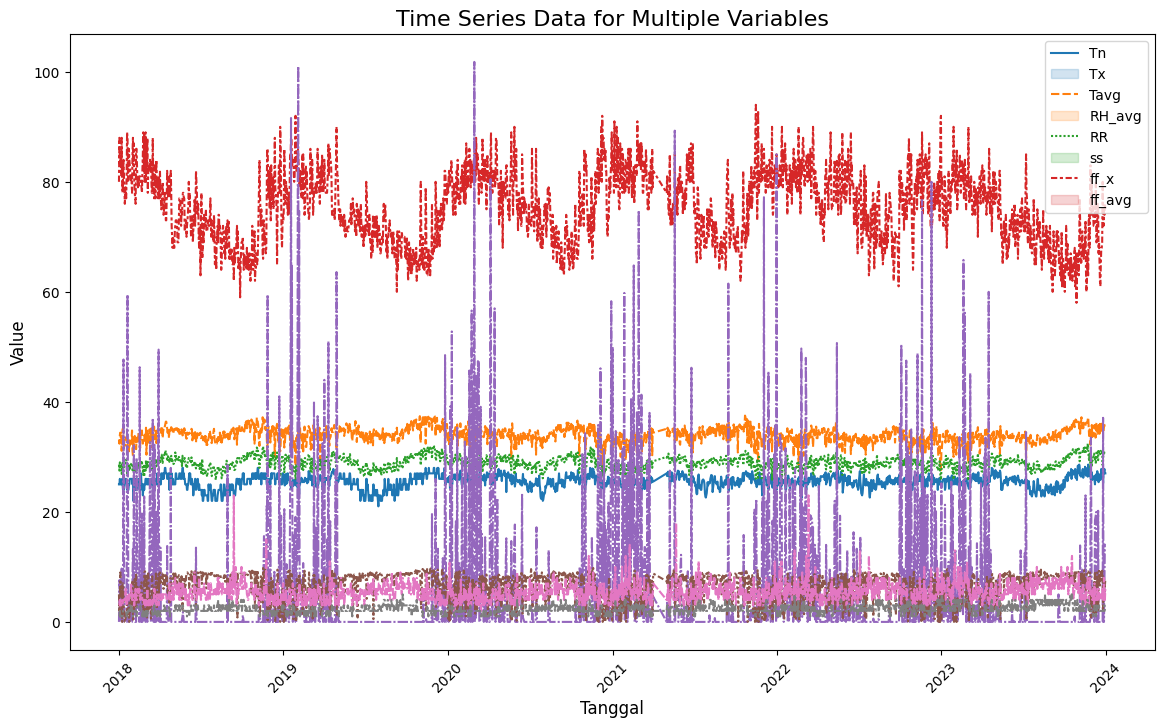

In [3]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore


plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_df[['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg']])

plt.title("Time Series Data for Multiple Variables", fontsize=16)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=45)

plt.legend(labels=['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg'], loc='upper right')
plt.show()




untuk sekarang saya akan biarkan tren data iklim untuk di proses setelah digabungkan dengan data target


### Missing value pada data iklim


Jumlah missing values di setiap kolom:
Tn          22
Tx           7
Tavg         2
RH_avg       2
RR         339
ss          11
ff_x         2
ff_avg       2
ddd_car      2
dtype: int64

Kolom yang memiliki missing values:
Index(['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg', 'ddd_car'], dtype='object')


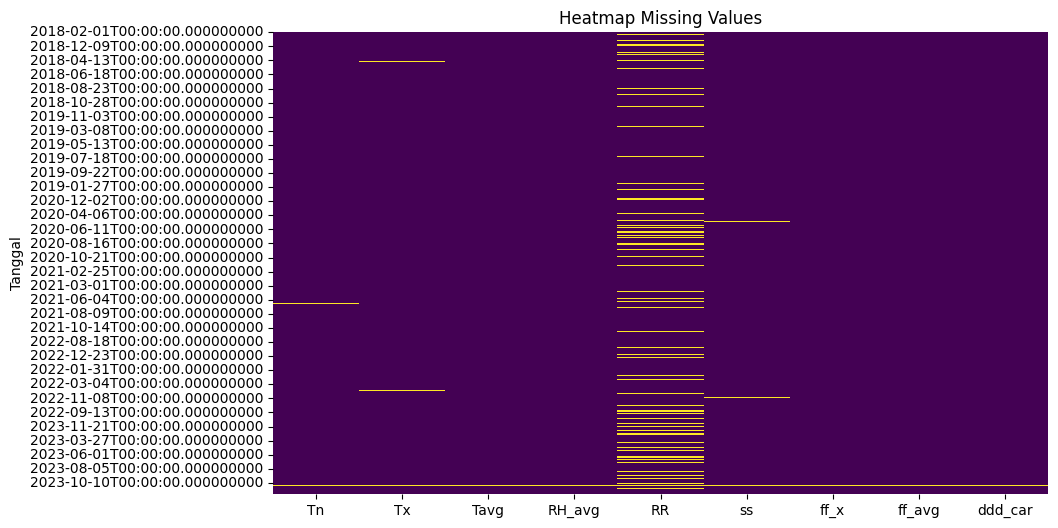

In [4]:
missing_values = combined_df.isnull().sum()

print("Jumlah missing values di setiap kolom:")
print(missing_values)


missing_columns = combined_df.columns[combined_df.isnull().any()]
print("\nKolom yang memiliki missing values:")
print(missing_columns)

plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Missing Values')
plt.show()

In [5]:
combined_df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
count,2209.000000,2224.000000,2229.000000,2229.000000,1892.000000,2220.000000,2229.000000,2229.000000
mean,25.469262,33.935387,28.905339,75.383131,5.385888,6.357658,5.382683,2.313145
std,1.157792,1.353120,1.079802,6.436989,12.339723,2.571589,1.663659,0.735550
min,21.000000,27.600000,25.700000,58.000000,0.000000,0.000000,2.000000,1.000000
25%,25.000000,33.200000,28.200000,70.000000,0.000000,4.600000,4.000000,2.000000
50%,25.600000,34.000000,28.900000,76.000000,0.000000,7.300000,5.000000,2.000000
75%,26.200000,34.800000,29.600000,80.000000,3.825000,8.500000,6.000000,3.000000
max,28.600000,37.600000,32.400000,94.000000,101.800000,9.800000,23.000000,5.000000


In [6]:

print(combined_df.dtypes)


Tn         float64
Tx         float64
Tavg       float64
RH_avg     float64
RR         float64
ss         float64
ff_x       float64
ff_avg     float64
ddd_car     object
dtype: object


In [7]:
combined_df.drop(columns=['ddd_car'], inplace=True)

### Prepocessing dini data fitur


sekarang karena saya mau jadikan data iklim haian ini pola bulanan dengan rata rata, maka saya harus me rata-rata data harian tersebut per bulan, jadi dilakukan prepocessing dini


pertama, untuk data missing saya lakukan interpolasi linear pada fitur RR


C:\Users\ahmad\AppData\Local\Temp\ipykernel_5216\977787435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['RR'].interpolate(method='linear', inplace=True)


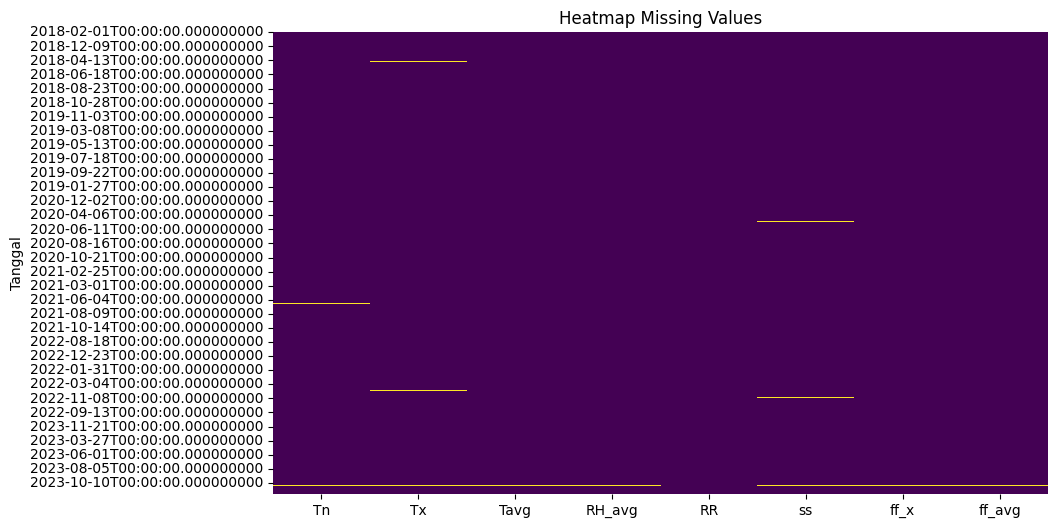

In [8]:

combined_df['RR'].interpolate(method='linear', inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Missing Values')
plt.show()

dan untuk missing value yang lain saya coba untuk di hapus karena tidak terlalu banyak


In [9]:
combined_df = combined_df.dropna()

In [10]:
combined_df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
count,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000
mean,25.469476,33.941503,28.908246,75.346697,5.213440,6.372711,5.380866,2.309795
std,1.157484,1.355641,1.082895,6.444743,11.844165,2.564267,1.667098,0.735027
min,21.000000,27.600000,25.700000,58.000000,0.000000,0.000000,2.000000,1.000000
25%,25.000000,33.200000,28.200000,70.000000,0.000000,4.600000,4.000000,2.000000
50%,25.600000,34.000000,28.900000,76.000000,0.000000,7.300000,5.000000,2.000000
75%,26.200000,34.800000,29.600000,80.000000,4.000000,8.500000,6.000000,3.000000
max,28.600000,37.600000,32.400000,94.000000,101.800000,9.800000,23.000000,5.000000


### Mencari Outlier Pada data fitur


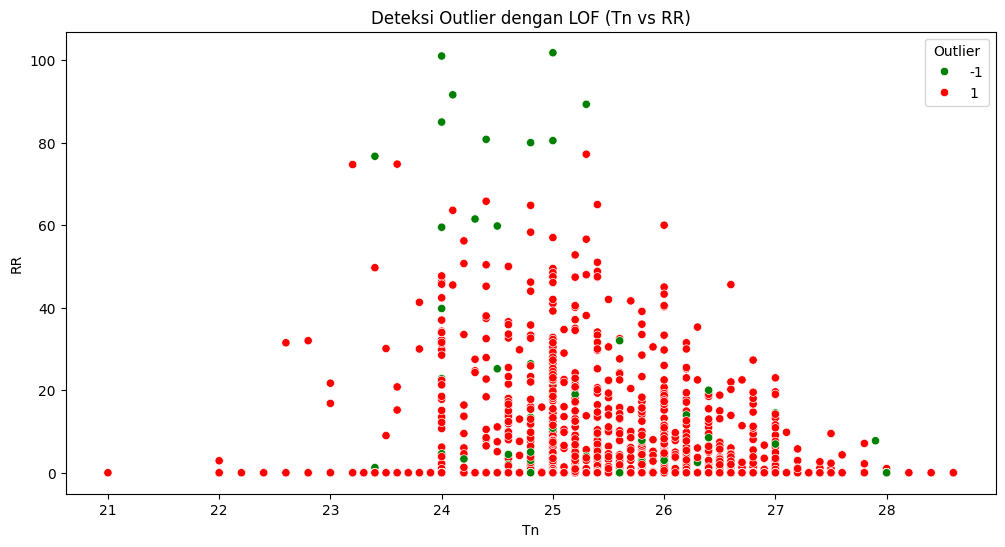

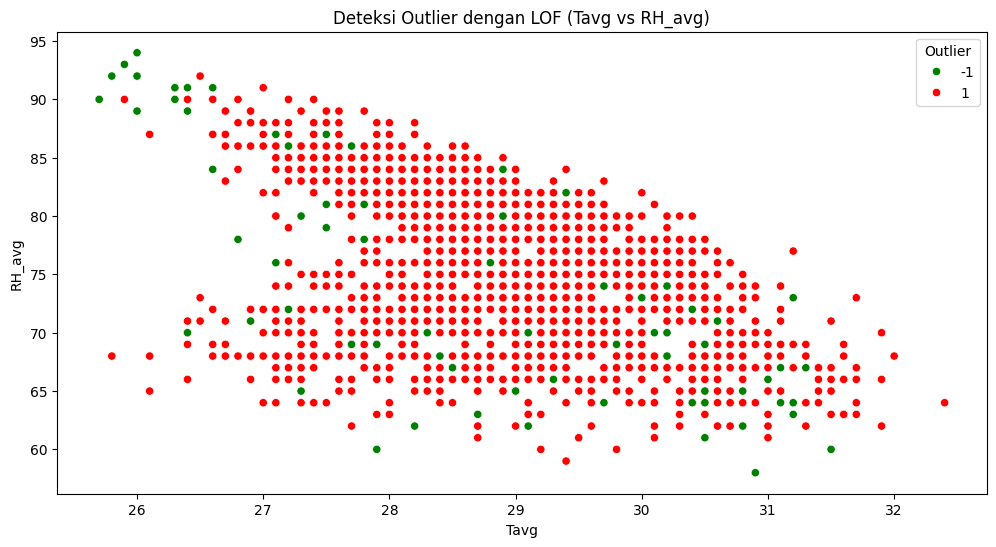

Skor LOF untuk tiap data:
              Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ff_avg  Outlier  \
Tanggal                                                                  
2018-02-01  26.0  30.2  27.5    88.0  13.2  0.4   4.0     1.0        1   
2018-02-02  22.0  33.0  28.3    83.0   2.9  2.4   4.0     2.0        1   
2018-02-03  24.0  32.0  27.1    87.0  32.1  5.3   4.0     2.0        1   
2018-02-04  25.0  33.3  28.9    80.0   8.1  2.0   3.0     2.0        1   
2018-02-05  26.0  33.8  28.7    78.0   0.3  7.8   5.0     2.0        1   
...          ...   ...   ...     ...   ...  ...   ...     ...      ...   
2023-01-27  25.2  32.4  28.2    80.0   0.9  0.5   4.0     3.0        1   
2023-01-29  25.0  32.8  27.4    82.0  11.5  0.0  10.0     2.0        1   
2023-01-30  25.4  34.0  29.1    80.0   3.8  4.6   7.0     3.0        1   
2023-01-31  26.4  34.2  28.9    80.0   8.5  1.6  13.0     4.0       -1   
2023-02-01  25.6  32.4  28.2    78.0  13.2  2.8   7.0     2.0        1   

           

In [11]:
from sklearn.neighbors import LocalOutlierFactor

columns_to_analyze = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg']


combined_df = combined_df.dropna(subset=columns_to_analyze)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

outlier_labels = lof.fit_predict(combined_df[columns_to_analyze])
outlier_scores = lof.negative_outlier_factor_

combined_df['Outlier'] = outlier_labels


plt.figure(figsize=(12, 6))
sns.scatterplot(x='Tn', y='RR', hue='Outlier', palette=['green', 'red'], data=combined_df)
plt.title("Deteksi Outlier dengan LOF (Tn vs RR)")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Tavg', y='RH_avg', hue='Outlier', palette=['green', 'red'], data=combined_df)
plt.title("Deteksi Outlier dengan LOF (Tavg vs RH_avg)")
plt.show()

combined_df['LOF_Score'] = outlier_scores
print("Skor LOF untuk tiap data:")
print(combined_df[['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg', 'Outlier', 'LOF_Score']])


In [12]:

combined_df['LOF_Score'] = outlier_scores


print("Outlier data:")
outliers = combined_df[combined_df['Outlier'] == -1]  # Memilih hanya outlier
for index, row in outliers.iterrows():
    print(f"Index: {index}, Tn: {row['Tn']}, Tx: {row['Tx']}, Tavg: {row['Tavg']}, RH_avg: {row['RH_avg']}, RR: {row['RR']}, ss: {row['ss']}, ff_x: {row['ff_x']}, ff_avg: {row['ff_avg']}, LOF Score: {row['LOF_Score']:.2f}")


Outlier data:
Index: 2018-02-26 00:00:00, Tn: 24.0, Tx: 33.0, Tavg: 26.4, RH_avg: 89.0, RR: 22.8, ss: 9.0, ff_x: 3.0, ff_avg: 1.0, LOF Score: -1.45
Index: 2018-11-22 00:00:00, Tn: 26.0, Tx: 35.0, Tavg: 30.5, RH_avg: 68.0, RR: 3.2, ss: 9.5, ff_x: 5.0, ff_avg: 2.0, LOF Score: -1.87
Index: 2018-11-24 00:00:00, Tn: 27.0, Tx: 34.7, Tavg: 30.2, RH_avg: 68.0, RR: 0.0, ss: 8.4, ff_x: 15.0, ff_avg: 2.0, LOF Score: -2.25
Index: 2018-12-18 00:00:00, Tn: 26.0, Tx: 36.0, Tavg: 30.8, RH_avg: 65.0, RR: 0.0, ss: 6.2, ff_x: 4.0, ff_avg: 2.0, LOF Score: -1.33
Index: 2018-12-28 00:00:00, Tn: 25.0, Tx: 33.8, Tavg: 29.1, RH_avg: 70.0, RR: 6.0, ss: 4.5, ff_x: 5.0, ff_avg: 2.0, LOF Score: -1.37
Index: 2018-12-29 00:00:00, Tn: 25.0, Tx: 34.5, Tavg: 30.2, RH_avg: 68.0, RR: 0.0, ss: 1.0, ff_x: 5.0, ff_avg: 3.0, LOF Score: -1.33
Index: 2018-07-03 00:00:00, Tn: 24.0, Tx: 33.5, Tavg: 26.8, RH_avg: 78.0, RR: 0.0, ss: 8.8, ff_x: 5.0, ff_avg: 2.0, LOF Score: -1.34
Index: 2018-07-14 00:00:00, Tn: 23.0, Tx: 32.0, Tavg:

penanganan outlier saya menggunakan presentil


Kode ini mengganti nilai outlier dengan batas bawah (1% persentil) dan batas atas (99% persentil) dari masing-masing kolom. Ini membantu menjaga data tetap berada dalam rentang yang lebih realistis.


In [13]:

lower_percentile = 1
upper_percentile = 99

for column in columns_to_analyze:
    lower_bound = combined_df[column].quantile(lower_percentile / 100)
    upper_bound = combined_df[column].quantile(upper_percentile / 100)
    
    combined_df.loc[combined_df['Outlier'] == -1, column] = combined_df.loc[combined_df['Outlier'] == -1, column].clip(lower=lower_bound, upper=upper_bound)
    
print("Outlier telah diganti dengan batas persentil 1 dan 99.")


Outlier telah diganti dengan batas persentil 1 dan 99.


In [14]:
combined_df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg,Outlier,LOF_Score
count,2195.00000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000
mean,25.46939,33.946364,28.910129,75.340319,5.084709,6.372255,5.349431,2.308428,0.899772,-1.080471
std,1.15730,1.337254,1.077985,6.410480,11.081937,2.563688,1.503716,0.730940,0.436459,0.161981
min,21.00000,27.600000,25.700000,59.000000,0.000000,0.000000,2.000000,1.000000,-1.000000,-4.509491
25%,25.00000,33.200000,28.200000,70.000000,0.000000,4.600000,4.000000,2.000000,1.000000,-1.102448
50%,25.60000,34.000000,28.900000,76.000000,0.000000,7.300000,5.000000,2.000000,1.000000,-1.039218
75%,26.20000,34.800000,29.600000,80.000000,4.000000,8.500000,6.000000,3.000000,1.000000,-1.002116
max,28.60000,37.600000,32.400000,92.000000,77.200000,9.800000,10.000000,5.000000,1.000000,-0.957458


## Rerata dan Modus


karena saya mau menjadikan data fitur harian ini sebagai data bulanan, maka setelah prepocessing awal tadi saya menggunakan rata-rata per bulan


In [15]:

monthly_average_df = combined_df.resample('ME').mean()
print(monthly_average_df)

                   Tn         Tx       Tavg     RH_avg        RR        ss  \
Tanggal                                                                      
2018-01-31  25.200000  32.933333  28.253333  81.966667  8.025933  3.370000   
2018-02-28  24.857143  32.925000  28.128357  82.142857  9.503571  4.782143   
2018-03-31  25.281250  33.825000  28.637500  81.750000  9.582812  4.934375   
2018-04-30  26.310345  35.037931  29.844828  77.034483  1.706897  7.217241   
2018-05-31  26.000000  34.619355  29.406452  72.677419  0.077419  7.341935   
...               ...        ...        ...        ...       ...       ...   
2023-08-31  24.112500  33.190625  28.062500  69.468750  0.000000  8.268750   
2023-09-30  24.454839  33.964516  28.532258  65.903226  0.322581  8.467742   
2023-10-31  26.516667  35.523333  30.396667  64.766667  0.033333  8.580000   
2023-11-30  27.170968  35.558065  30.764516  68.870968  3.975806  6.970968   
2023-12-31  26.559375  35.065625  30.140625  72.437500  5.853125

In [16]:
monthly_average_df

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg,Outlier,LOF_Score
Tanggal,,,,,,,,,,
2018-01-31,25.200000,32.933333,28.253333,81.966667,8.025933,3.370000,4.200000,1.766667,0.933333,-1.060984
2018-02-28,24.857143,32.925000,28.128357,82.142857,9.503571,4.782143,4.428571,2.035714,0.928571,-1.082003
2018-03-31,25.281250,33.825000,28.637500,81.750000,9.582812,4.934375,4.062500,1.718750,1.000000,-1.047982
2018-04-30,26.310345,35.037931,29.844828,77.034483,1.706897,7.217241,4.689655,2.034483,1.000000,-1.033598
2018-05-31,26.000000,34.619355,29.406452,72.677419,0.077419,7.341935,5.516129,2.225806,1.000000,-1.036771
...,...,...,...,...,...,...,...,...,...,...
2023-08-31,24.112500,33.190625,28.062500,69.468750,0.000000,8.268750,7.000000,3.468750,0.875000,-1.055754
2023-09-30,24.454839,33.964516,28.532258,65.903226,0.322581,8.467742,6.967742,3.483871,0.741935,-1.161213
2023-10-31,26.516667,35.523333,30.396667,64.766667,0.033333,8.580000,7.100000,3.233333,0.733333,-1.165511


In [17]:

monthly_average_df.index = pd.to_datetime(monthly_average_df.index)
monthly_average_df.index = monthly_average_df.index.strftime('%Y-%m')
print(monthly_average_df.index)


Index(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
      dtype='object', name='Tanggal')


In [18]:
monthly_average_df

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg,Outlier,LOF_Score
Tanggal,,,,,,,,,,
2018-01,25.200000,32.933333,28.253333,81.966667,8.025933,3.370000,4.200000,1.766667,0.933333,-1.060984
2018-02,24.857143,32.925000,28.128357,82.142857,9.503571,4.782143,4.428571,2.035714,0.928571,-1.082003
2018-03,25.281250,33.825000,28.637500,81.750000,9.582812,4.934375,4.062500,1.718750,1.000000,-1.047982
2018-04,26.310345,35.037931,29.844828,77.034483,1.706897,7.217241,4.689655,2.034483,1.000000,-1.033598
2018-05,26.000000,34.619355,29.406452,72.677419,0.077419,7.341935,5.516129,2.225806,1.000000,-1.036771
...,...,...,...,...,...,...,...,...,...,...
2023-08,24.112500,33.190625,28.062500,69.468750,0.000000,8.268750,7.000000,3.468750,0.875000,-1.055754
2023-09,24.454839,33.964516,28.532258,65.903226,0.322581,8.467742,6.967742,3.483871,0.741935,-1.161213
2023-10,26.516667,35.523333,30.396667,64.766667,0.033333,8.580000,7.100000,3.233333,0.733333,-1.165511


In [19]:
monthly_average_df.to_excel('monthly_average_iklim.xlsx')

## Data untuk Target


disini saya mengambil data produksi beras bulanan dari Badan pusat statistik daerah surabaya


In [20]:
import pandas as pd # type: ignore
import glob
import os


folder_path = './produksi padi per tahun/'
file_paths = glob.glob(os.path.join(folder_path, '*.xlsx'))
data_produksi_list = []

for file in file_paths:
    df_produksi = pd.read_excel(file, skiprows=3)  
    surabaya_data = df_produksi[df_produksi['Kabupaten/Kota Se Jawa Timur'].str.contains('Surabaya', case=False, na=False)]
    surabaya_bulanan = surabaya_data[[ 'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni','Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember','Tahun']]
    data_produksi_list.append(surabaya_bulanan)


combined_produksi_df = pd.concat(data_produksi_list, ignore_index=True)


print(combined_produksi_df)


  Januari Februari    Maret    April     Mei    Juni    Juli  Agustus  \
0  387.78   593.65  2783.45   659.83  284.12  235.23  908.55  1189.85   
1  259.45    105.9  2456.99   277.26  420.55   263.1   438.8   233.09   
2   12.23   126.06    88.56  4568.32  1265.9  445.17  533.79  1136.45   
3  450.93   162.11  3805.02  1136.33  412.04  703.65  1149.5   550.23   
4   98.34   982.24  3416.56   866.09  208.34  147.72  576.62   741.73   
5   276.3   884.61   925.32   299.47  422.53     707  198.86   518.42   

  September Oktober November Desember  Tahun  
0    753.98  187.17   100.05   231.19   2018  
1    215.45  450.96   204.03   187.24   2019  
2    735.18   474.2   631.21    58.13   2020  
3    216.68  616.55   343.55   286.08   2021  
4    520.13  101.35   203.33   254.86   2022  
5    142.21  107.49   150.83    26.09   2023  


In [21]:
combined_produksi_df

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahun
0,387.78,593.65,2783.45,659.83,284.12,235.23,908.55,1189.85,753.98,187.17,100.05,231.19,2018
1,259.45,105.9,2456.99,277.26,420.55,263.1,438.8,233.09,215.45,450.96,204.03,187.24,2019
2,12.23,126.06,88.56,4568.32,1265.9,445.17,533.79,1136.45,735.18,474.2,631.21,58.13,2020
3,450.93,162.11,3805.02,1136.33,412.04,703.65,1149.5,550.23,216.68,616.55,343.55,286.08,2021
4,98.34,982.24,3416.56,866.09,208.34,147.72,576.62,741.73,520.13,101.35,203.33,254.86,2022
5,276.3,884.61,925.32,299.47,422.53,707,198.86,518.42,142.21,107.49,150.83,26.09,2023


lalu saya membuat datanya berbentuk baris sebagai data target


In [22]:

folder_path = './produksi padi per tahun/'
file_paths = glob.glob(os.path.join(folder_path, '*.xlsx'))
data_produksi_list = []
for file in file_paths:
    df_produksi = pd.read_excel(file, skiprows=3) 
    surabaya_data = df_produksi[df_produksi['Kabupaten/Kota Se Jawa Timur'].str.contains('Surabaya', case=False, na=False)]
    surabaya_bulanan = surabaya_data[['Tahun', 'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni','Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']]
    data_produksi_list.append(surabaya_bulanan)

combined_produksi_df = pd.concat(data_produksi_list, ignore_index=True)
long_format_df = combined_produksi_df.melt(id_vars='Tahun', 
                                            value_vars=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                                                        'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],
                                            var_name='Bulan', value_name='Produksi')

bulan_dict = {
    'Januari': 'Jan',
    'Februari': 'Feb',
    'Maret': 'Mar',
    'April': 'Apr',
    'Mei': 'May',
    'Juni': 'Jun',
    'Juli': 'Jul',
    'Agustus': 'Aug',
    'September': 'Sep',
    'Oktober': 'Oct',
    'November': 'Nov',
    'Desember': 'Dec'
}
long_format_df['Bulan'] = long_format_df['Bulan'].replace(bulan_dict)
long_format_df['Tanggal'] = pd.to_datetime(long_format_df['Tahun'].astype(str) + '-' + 
                                            long_format_df['Bulan'] + '-01')
long_format_df['Tanggal'] = long_format_df['Tanggal'].dt.strftime('%Y-%m')
sorted_df = long_format_df.sort_values(by='Tanggal')
final_df = sorted_df[['Tanggal', 'Produksi']]

final_df

,Tanggal,Produksi
0,2018-01,387.78
6,2018-02,593.65
12,2018-03,2783.45
18,2018-04,659.83
24,2018-05,284.12
...,...,...
47,2023-08,518.42
53,2023-09,142.21
59,2023-10,107.49
65,2023-11,150.83


## Penggabungan data fitur dan data object


In [23]:

final_df.set_index('Tanggal', inplace=True)


merged_df = final_df.merge(monthly_average_df, left_index=True, right_index=True, how='inner')


print(merged_df)



        Produksi         Tn         Tx       Tavg     RH_avg        RR  \
Tanggal                                                                  
2018-01   387.78  25.200000  32.933333  28.253333  81.966667  8.025933   
2018-02   593.65  24.857143  32.925000  28.128357  82.142857  9.503571   
2018-03  2783.45  25.281250  33.825000  28.637500  81.750000  9.582812   
2018-04   659.83  26.310345  35.037931  29.844828  77.034483  1.706897   
2018-05   284.12  26.000000  34.619355  29.406452  72.677419  0.077419   
...          ...        ...        ...        ...        ...       ...   
2023-08   518.42  24.112500  33.190625  28.062500  69.468750  0.000000   
2023-09   142.21  24.454839  33.964516  28.532258  65.903226  0.322581   
2023-10   107.49  26.516667  35.523333  30.396667  64.766667  0.033333   
2023-11   150.83  27.170968  35.558065  30.764516  68.870968  3.975806   
2023-12    26.09  26.559375  35.065625  30.140625  72.437500  5.853125   

               ss      ff_x    ff_avg

In [24]:
merged_df

,Produksi,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg,Outlier,LOF_Score
Tanggal,,,,,,,,,,,
2018-01,387.78,25.200000,32.933333,28.253333,81.966667,8.025933,3.370000,4.200000,1.766667,0.933333,-1.060984
2018-02,593.65,24.857143,32.925000,28.128357,82.142857,9.503571,4.782143,4.428571,2.035714,0.928571,-1.082003
2018-03,2783.45,25.281250,33.825000,28.637500,81.750000,9.582812,4.934375,4.062500,1.718750,1.000000,-1.047982
2018-04,659.83,26.310345,35.037931,29.844828,77.034483,1.706897,7.217241,4.689655,2.034483,1.000000,-1.033598
2018-05,284.12,26.000000,34.619355,29.406452,72.677419,0.077419,7.341935,5.516129,2.225806,1.000000,-1.036771
...,...,...,...,...,...,...,...,...,...,...,...
2023-08,518.42,24.112500,33.190625,28.062500,69.468750,0.000000,8.268750,7.000000,3.468750,0.875000,-1.055754
2023-09,142.21,24.454839,33.964516,28.532258,65.903226,0.322581,8.467742,6.967742,3.483871,0.741935,-1.161213
2023-10,107.49,26.516667,35.523333,30.396667,64.766667,0.033333,8.580000,7.100000,3.233333,0.733333,-1.165511


In [25]:
merged_df= merged_df.drop(columns=['Outlier', 'LOF_Score'])

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 2018-01 to 2023-12
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Produksi  72 non-null     object 
 1   Tn        72 non-null     float64
 2   Tx        72 non-null     float64
 3   Tavg      72 non-null     float64
 4   RH_avg    72 non-null     float64
 5   RR        72 non-null     float64
 6   ss        72 non-null     float64
 7   ff_x      72 non-null     float64
 8   ff_avg    72 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.6+ KB


- Tn: Temperatur minimum(°C)
- Tx: Temperatur maksimum (°C)
- Tavg: Temperatur rata-rata (°C)
- RH_avg: Kelembapan rata-rata (%)
- RR: Curah hujan (mm)
- ss: Lamanya penyinaran matahari (jam)
- ff_x: Kecepatan angin maksimum (m/s)
- ff_avg: Kecepatan angin rata-rata (m/s)
- ddd_car: Arah angin terbanyak (°)


In [27]:
merged_df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,25.472469,33.943013,28.910712,75.485544,5.119454,6.392163,5.371050,2.305338
std,0.816777,0.844170,0.761956,5.173377,5.057597,1.525237,0.785035,0.420066
min,23.156250,32.433333,27.560000,64.766667,0.000000,3.153125,4.000000,1.656250
25%,25.128024,33.409532,28.358096,71.562500,0.486541,5.203906,4.806452,2.025000
50%,25.586667,33.819167,28.773081,76.726919,4.017742,6.482258,5.317540,2.237903
75%,26.045775,34.385484,29.335192,80.361111,9.436204,7.525000,5.942992,2.567036
max,27.170968,36.022968,30.890323,82.178571,20.255172,8.925000,7.100000,3.483871


In [28]:
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns # type: ignore
%matplotlib inline


In [29]:
df_main = merged_df.copy()



## Data Main


mari kita lihat hasil tren dataset


In [30]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 2018-01 to 2023-12
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Produksi  72 non-null     object 
 1   Tn        72 non-null     float64
 2   Tx        72 non-null     float64
 3   Tavg      72 non-null     float64
 4   RH_avg    72 non-null     float64
 5   RR        72 non-null     float64
 6   ss        72 non-null     float64
 7   ff_x      72 non-null     float64
 8   ff_avg    72 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.6+ KB


Keterangan :

- 8888: data tidak terukur
- 9999: Tidak Ada Data (tidak dilakukan pengukuran)
- Tn: Temperatur minimum (°C)
- Tx: Temperatur maksimum (°C)
- Tavg: Temperatur rata-rata (°C)
- RH_avg: Kelembapan rata-rata (%)
- RR: Curah hujan (mm)
- ss: Lamanya penyinaran matahari (jam)
- ff_x: Kecepatan angin maksimum (m/s)
- ff_avg: Kecepatan angin rata-rata (m/s)
- ddd_car: Arah angin terbanyak (°)


In [31]:
# Membersihkan kolom Produksi
df_main['Produksi'] = df_main['Produksi'].replace(',', '', regex=True).astype(float)


C:\Users\ahmad\AppData\Local\Temp\ipykernel_5216\1238890838.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_main['Produksi'] = df_main['Produksi'].replace(',', '', regex=True).astype(float)


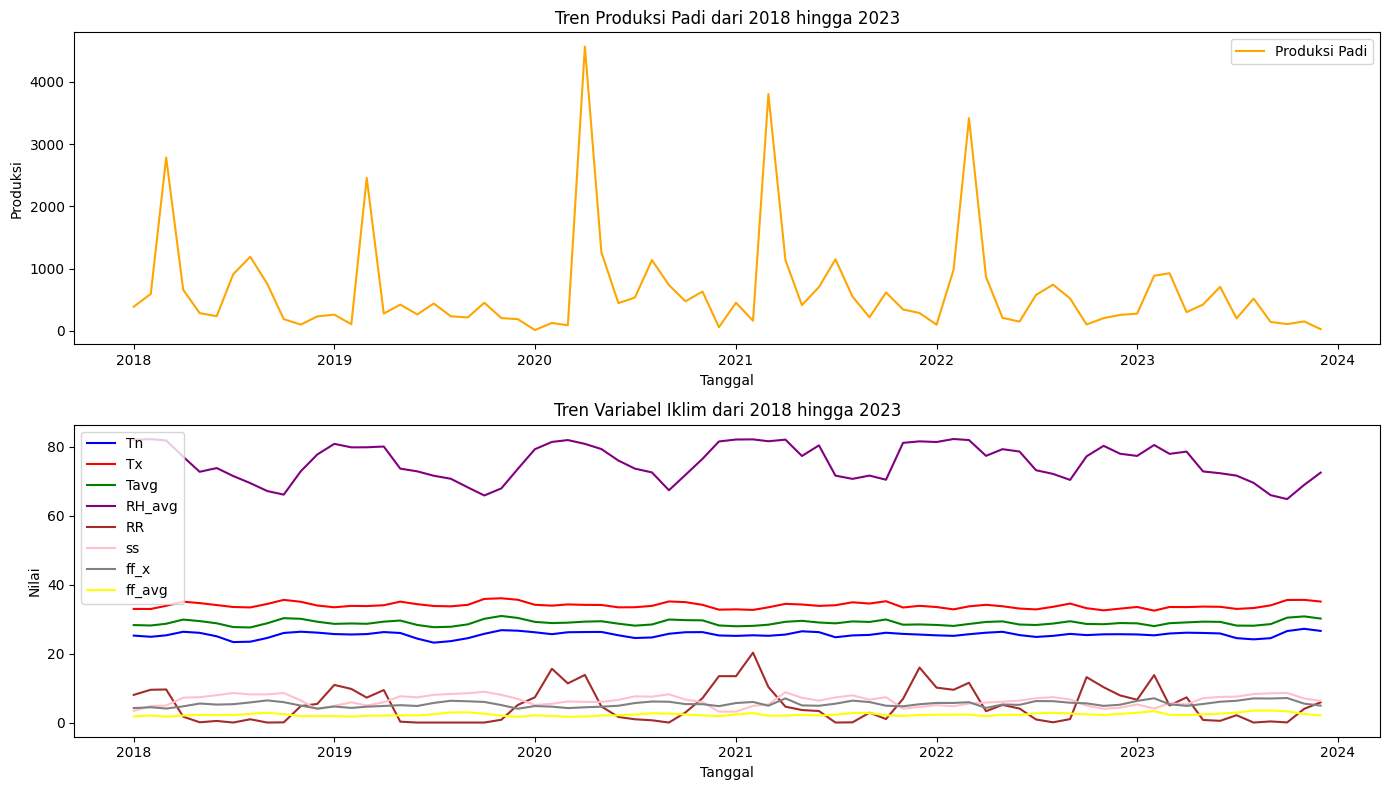

In [32]:

df_main.index = pd.to_datetime(df_main.index)

# Membuat subplot
plt.figure(figsize=(14, 8))

# Plot untuk Produksi
plt.subplot(2, 1, 1)
plt.plot(df_main.index, df_main['Produksi'], color='orange', label='Produksi Padi')
plt.title('Tren Produksi Padi dari 2018 hingga 2023')
plt.xlabel('Tanggal')
plt.ylabel('Produksi')
plt.legend()

# Plot untuk Variabel Iklim
plt.subplot(2, 1, 2)
plt.plot(df_main.index, df_main['Tn'], label='Tn', color='blue')
plt.plot(df_main.index, df_main['Tx'], label='Tx', color='red')
plt.plot(df_main.index, df_main['Tavg'], label='Tavg', color='green')
plt.plot(df_main.index, df_main['RH_avg'], label='RH_avg', color='purple')
plt.plot(df_main.index, df_main['RR'], label='RR', color='brown')
plt.plot(df_main.index, df_main['ss'], label='ss', color='pink')
plt.plot(df_main.index, df_main['ff_x'], label='ff_x', color='gray')
plt.plot(df_main.index, df_main['ff_avg'], label='ff_avg', color='yellow')

plt.title('Tren Variabel Iklim dari 2018 hingga 2023')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()

plt.tight_layout()
plt.show()


In [33]:
df_main.describe()

,Produksi,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,645.999722,25.472469,33.943013,28.910712,75.485544,5.119454,6.392163,5.371050,2.305338
std,844.424487,0.816777,0.844170,0.761956,5.173377,5.057597,1.525237,0.785035,0.420066
min,12.230000,23.156250,32.433333,27.560000,64.766667,0.000000,3.153125,4.000000,1.656250
25%,203.855000,25.128024,33.409532,28.358096,71.562500,0.486541,5.203906,4.806452,2.025000
50%,416.295000,25.586667,33.819167,28.773081,76.726919,4.017742,6.482258,5.317540,2.237903
75%,714.045000,26.045775,34.385484,29.335192,80.361111,9.436204,7.525000,5.942992,2.567036
max,4568.320000,27.170968,36.022968,30.890323,82.178571,20.255172,8.925000,7.100000,3.483871


In [34]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-01-01 to 2023-12-01
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Produksi  72 non-null     float64
 1   Tn        72 non-null     float64
 2   Tx        72 non-null     float64
 3   Tavg      72 non-null     float64
 4   RH_avg    72 non-null     float64
 5   RR        72 non-null     float64
 6   ss        72 non-null     float64
 7   ff_x      72 non-null     float64
 8   ff_avg    72 non-null     float64
dtypes: float64(9)
memory usage: 5.6 KB


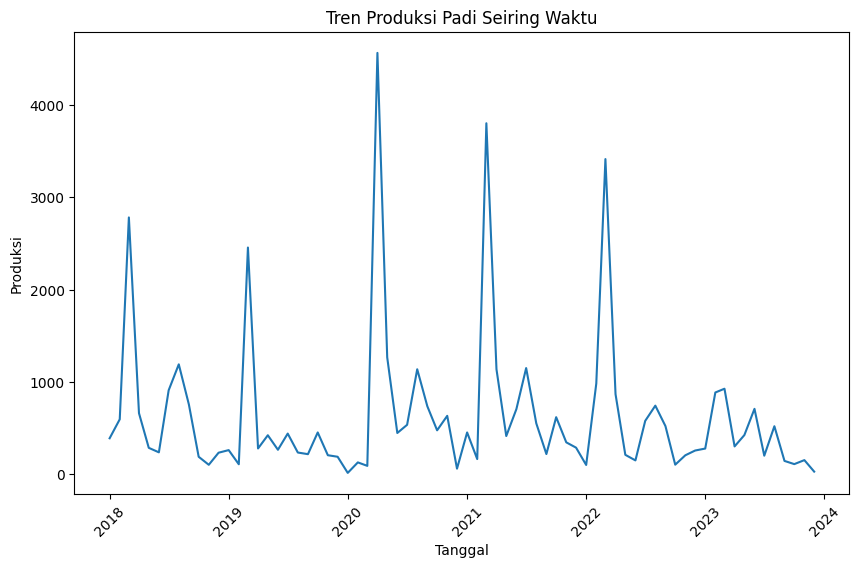

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_main, x='Tanggal', y='Produksi')
plt.title('Tren Produksi Padi Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Produksi')
plt.xticks(rotation=45)  # Agar label tanggal terbaca dengan baik
plt.show()


Sebelum Interpolasi:
            Produksi
Tanggal             
2018-01-01    387.78
2018-02-01    593.65
2018-03-01       NaN
2018-04-01    659.83
2018-05-01    284.12
2018-06-01    235.23
2018-07-01    908.55
2018-08-01       NaN
2018-09-01    753.98
2018-10-01    187.17

Setelah Interpolasi:
              Produksi
Tanggal               
2018-01-01   387.78000
2018-02-01   593.65000
2018-03-01   729.00983
2018-04-01   659.83000
2018-05-01   284.12000
2018-06-01   235.23000
2018-07-01   908.55000
2018-08-01  1105.62820
2018-09-01   753.98000
2018-10-01   187.17000


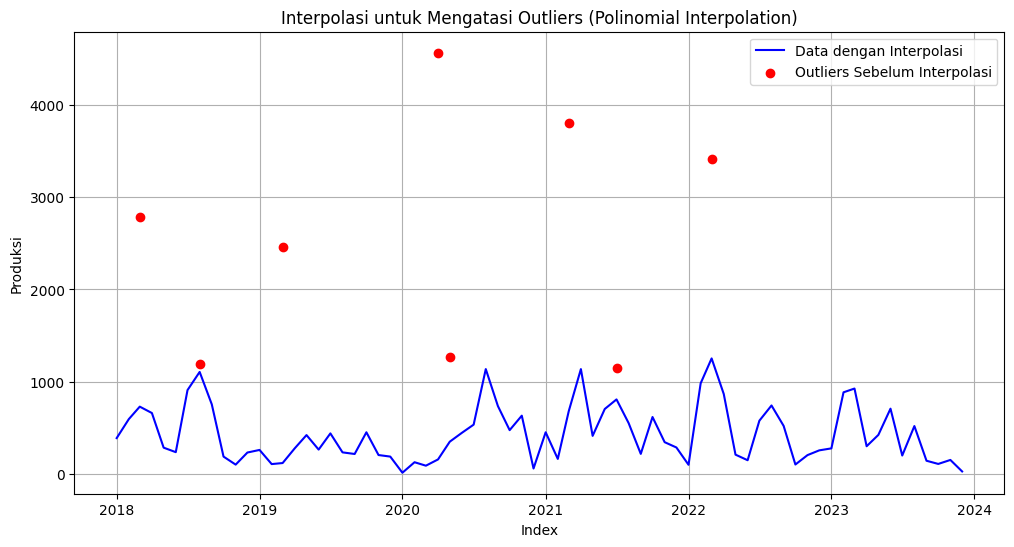

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


lof = LocalOutlierFactor(n_neighbors=30, contamination=0.1)  # contamination adalah proporsi outlier

outliers = lof.fit_predict(df_main[['ff_avg', 'Tavg', 'Tn', 'ss', 'Produksi']])

df_main['outlier'] = outliers

outliers_detected = df_main[df_main['outlier'] == -1]

df_main.loc[outliers_detected.index, 'Produksi'] = np.nan

print("Sebelum Interpolasi:")
print(df_main[['Produksi']].head(10))  # Menampilkan 10 baris pertama

df_main['Produksi'] = df_main['Produksi'].interpolate(method='polynomial', order=2)
# df_main['Produksi'] = df_main['Produksi'].interpolate(method='linear')


print("\nSetelah Interpolasi:")
print(df_main[['Produksi']].head(10))  # Menampilkan 10 baris pertama

plt.figure(figsize=(12, 6))
plt.plot(df_main['Produksi'], label="Data dengan Interpolasi", color='blue')
plt.scatter(outliers_detected.index, outliers_detected['Produksi'], label="Outliers Sebelum Interpolasi", color='red')

plt.title('Interpolasi untuk Mengatasi Outliers (Polinomial Interpolation)')
plt.xlabel('Index')
plt.ylabel('Produksi')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-01-01 to 2023-12-01
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Produksi  72 non-null     float64
 1   Tn        72 non-null     float64
 2   Tx        72 non-null     float64
 3   Tavg      72 non-null     float64
 4   RH_avg    72 non-null     float64
 5   RR        72 non-null     float64
 6   ss        72 non-null     float64
 7   ff_x      72 non-null     float64
 8   ff_avg    72 non-null     float64
 9   outlier   72 non-null     int32  
dtypes: float64(9), int32(1)
memory usage: 8.0 KB


In [38]:
df_main.describe()  

,Produksi,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg,outlier
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,431.576852,25.472469,33.943013,28.910712,75.485544,5.119454,6.392163,5.371050,2.305338,0.777778
std,307.532331,0.816777,0.844170,0.761956,5.173377,5.057597,1.525237,0.785035,0.420066,0.632950
min,12.230000,23.156250,32.433333,27.560000,64.766667,0.000000,3.153125,4.000000,1.656250,-1.000000
25%,195.955000,25.128024,33.409532,28.358096,71.562500,0.486541,5.203906,4.806452,2.025000,1.000000
50%,346.187920,25.586667,33.819167,28.773081,76.726919,4.017742,6.482258,5.317540,2.237903,1.000000
75%,638.365000,26.045775,34.385484,29.335192,80.361111,9.436204,7.525000,5.942992,2.567036,1.000000
max,1252.200263,27.170968,36.022968,30.890323,82.178571,20.255172,8.925000,7.100000,3.483871,1.000000


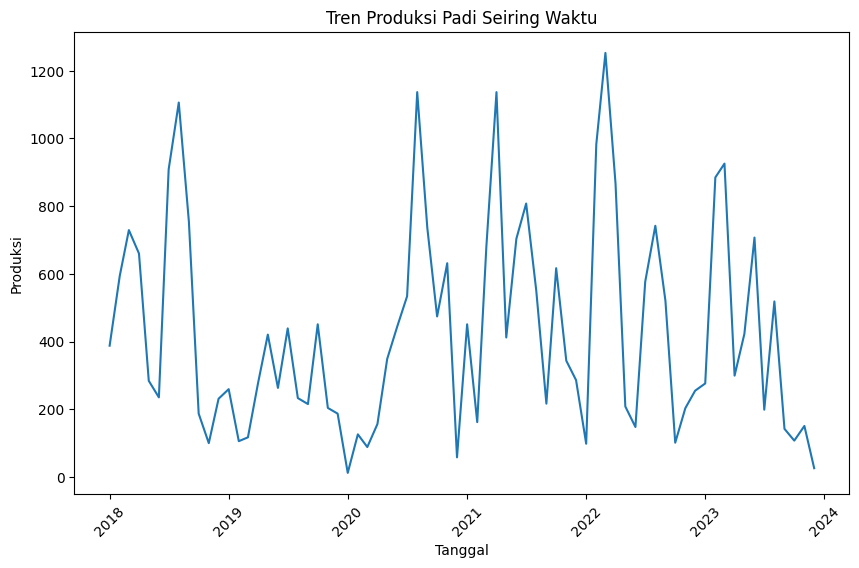

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_main, x='Tanggal', y='Produksi')
plt.title('Tren Produksi Padi Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Produksi')
plt.xticks(rotation=45)  # Agar label tanggal terbaca dengan baik
plt.show()


## Seleksi fitur berdasarkan korelasi


disini karena data time series univariate maka perlu dicari untuk korelasi fitur, saya akan menetapkan fitur dengan korelasi diatas 5 sebagai fitur yang akan dipakai


Produksi    1.000000
Tn         -0.296920
Tx         -0.139542
Tavg       -0.236221
RH_avg      0.001059
RR         -0.210896
ss          0.184120
ff_x        0.272847
ff_avg      0.118555
outlier    -0.252458
Name: Produksi, dtype: float64


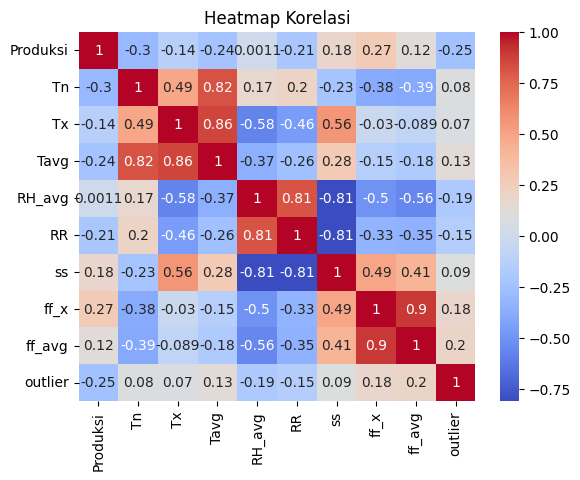

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antar fitur dan target
corr_matrix = df_main.corr()
print(corr_matrix['Produksi'])

# Visualisasi heatmap korelasi
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()


Hubungan Non-Linear: Korelasi Pearson hanya mengukur hubungan linear. Jika hubungan antara fitur cuaca dan produksi padi bersifat non-linear, korelasi Pearson tidak akan mendeteksinya dengan baik.


maka saya gunakan mutual information untuk mengidentifikasi hubungan non-linear antara fitur dan target.


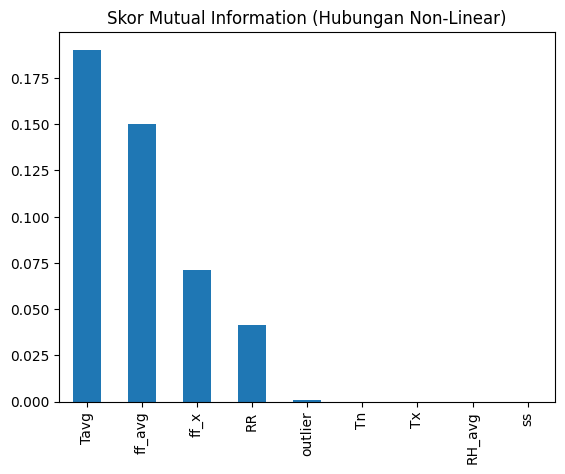

In [41]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(df_main.iloc[:, 1:], df_main['Produksi']) 
mi_scores = pd.Series(mi_scores, index=df_main.columns[1:])
mi_scores.sort_values(ascending=False).plot.bar()
plt.title("Skor Mutual Information (Hubungan Non-Linear)")
plt.show()


maka fitur yang saya ambil yaitu :

- ff_avg
- Tavg


## Normalisasi data


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_main_scaled = scaler.fit_transform(df_main)
df_main = pd.DataFrame(df_main_scaled, columns=df_main.columns)
df_main


,Produksi,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ff_avg,outlier
0,0.302870,0.509064,0.139290,0.208188,0.987830,0.396241,0.037574,0.064516,0.060416,1.0
1,0.468898,0.423664,0.136968,0.170661,0.997949,0.469192,0.282234,0.138249,0.207627,1.0
2,0.578062,0.529302,0.387690,0.323542,0.975386,0.473104,0.308609,0.020161,0.034197,0.0
3,0.522271,0.785633,0.725589,0.686068,0.704565,0.084270,0.704124,0.222469,0.206954,1.0
4,0.219271,0.708331,0.608982,0.554436,0.454330,0.003822,0.725728,0.489074,0.311638,1.0
...,...,...,...,...,...,...,...,...,...,...
67,0.408228,0.238186,0.210966,0.150886,0.270050,0.000000,0.886302,0.967742,0.991726,1.0
68,0.104825,0.323457,0.426557,0.291941,0.065275,0.015926,0.920778,0.957336,1.000000,1.0
69,0.076824,0.837024,0.860812,0.851769,0.000000,0.001646,0.940227,1.000000,0.862916,1.0
70,0.111777,1.000000,0.870487,0.962224,0.235718,0.196286,0.661456,0.478668,0.452841,1.0


# Data Modelling


In [43]:

selected_columns = ['ff_avg','Tavg', 'Produksi']

df_selected = df_main[selected_columns]

df_selected


,ff_avg,Tavg,Produksi
0,0.060416,0.208188,0.302870
1,0.207627,0.170661,0.468898
2,0.034197,0.323542,0.578062
3,0.206954,0.686068,0.522271
4,0.311638,0.554436,0.219271
...,...,...,...
67,0.991726,0.150886,0.408228
68,1.000000,0.291941,0.104825
69,0.862916,0.851769,0.076824
70,0.452841,0.962224,0.111777


In [44]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ff_avg    72 non-null     float64
 1   Tavg      72 non-null     float64
 2   Produksi  72 non-null     float64
dtypes: float64(3)
memory usage: 1.8 KB


## Persiapan data Train dan data Test


Pisahkan kolom Produksi sebagai target (label), dan kolom lainnya sebagai fitur (features).


In [45]:
X = df_selected[['ff_avg','Tavg']]
y = df_selected['Produksi']


Pisahkan data menjadi training dan testing set untuk melatih dan menguji model menjadi 80% train, 20% test


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)


Ukuran data training: (57, 2)
Ukuran data testing: (15, 2)


disini saya menggunakan MAPE dan RMSE untuk melihat error pada model


MAPE (Mean Absolute Percentage Error)

Penjelasan
MAPE adalah metrik untuk mengevaluasi performa model prediksi dengan menghitung rata-rata kesalahan absolut dalam bentuk persentase terhadap nilai aktual.

Rumusnya:

$$
\text{MAPE} = \frac{1}{n} \sum\_{i=1}^{n} \left| \frac{y_i - \hat{y}\_i}{y_i} \right| \times 100\%
$$

Komponen:

- \( y_i \): Nilai aktual.
- \( \hat{y}\_i \): Nilai prediksi.
- \( n \): Jumlah data.

Contoh:
Misalkan kita memiliki data berikut:

| \(y_i\) (Aktual) | \(\hat{y}\_i\) (Prediksi) |
| ---------------- | ------------------------- |
| 100              | 110                       |
| 200              | 180                       |
| 300              | 310                       |

Langkah Perhitungan:

1. Hitung kesalahan absolut persentase:

   $$
   \text{Error}\_1 = \left| \frac{100 - 110}{100} \right| \times 100 = 10\%
   $$

   $$
   \text{Error}\_2 = \left| \frac{200 - 180}{200} \right| \times 100 = 10\%
   $$

   $$
   \text{Error}\_3 = \left| \frac{300 - 310}{300} \right| \times 100 = 3.33\%
   $$

2. Hitung rata-rata kesalahan absolut persentase:
   $$
   \text{MAPE} = \frac{10 + 10 + 3.33}{3} = 7.78\%
   $$

Hasil:
MAPE untuk data ini adalah **7.78%**.

---

RMSE (Root Mean Squared Error)

Penjelasan
RMSE adalah metrik yang mengukur akar rata-rata kesalahan kuadrat antara nilai aktual dan prediksi. RMSE sangat sensitif terhadap kesalahan besar, sehingga cocok digunakan jika kesalahan besar memiliki dampak signifikan.

Rumusnya:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum\_{i=1}^{n} (y_i - \hat{y}\_i)^2}
$$

Komponen:

- \( y_i \): Nilai aktual.
- \( \hat{y}\_i \): Nilai prediksi.
- \( n \): Jumlah data.

Contoh:
Menggunakan data yang sama seperti di atas:

| \(y_i\) (Aktual) | \(\hat{y}\_i\) (Prediksi) |
| ---------------- | ------------------------- |
| 100              | 110                       |
| 200              | 180                       |
| 300              | 310                       |

Langkah Perhitungan:

1. Hitung kesalahan kuadrat:

   $$
   \text{Error}\_1 = (100 - 110)^2 = 100
   $$

   $$
   \text{Error}\_2 = (200 - 180)^2 = 400
   $$

   $$
   \text{Error}\_3 = (300 - 310)^2 = 100
   $$

2. Hitung rata-rata kesalahan kuadrat:

   $$
   \text{Mean Squared Error (MSE)} = \frac{100 + 400 + 100}{3} = 200
   $$

3. Hitung akar kuadrat rata-rata:
   $$
   \text{RMSE} = \sqrt{200} = 14.14
   $$

Hasil:
RMSE untuk data ini adalah **14.14**.

---

Perbandingan MAPE dan RMSE

- **MAPE** memberikan kesalahan dalam bentuk persentase, sehingga lebih mudah dipahami dalam konteks bisnis.
- **RMSE** lebih sensitif terhadap kesalahan besar, sehingga baik untuk mendeteksi model dengan prediksi buruk pada data tertentu.

Keduanya dapat digunakan bersamaan untuk mengevaluasi performa model prediksi.


## Model


### 1. Random Forest Regressor


Random Forest

Penjelasan
**Random Forest** adalah algoritma pembelajaran ensemble yang menggabungkan banyak _decision trees_ untuk membuat prediksi yang lebih akurat dan stabil. Ini digunakan untuk tugas regresi maupun klasifikasi.

Konsep Utama:

1. **Ensemble Learning**: Menggabungkan prediksi dari banyak model (dalam hal ini, decision trees) untuk meningkatkan akurasi.
2. **Bagging (Bootstrap Aggregating)**: Menggunakan subset acak dari data untuk melatih setiap decision tree.
3. **Random Feature Selection**: Setiap tree hanya mempertimbangkan subset fitur yang dipilih secara acak saat membuat split, sehingga menghasilkan variasi antar pohon.

Proses Random Forest:

1. Membuat _bootstrap samples_ dari data pelatihan (dengan penggantian).
2. Melatih setiap decision tree pada satu _bootstrap sample_.
3. Untuk prediksi:
   - **Klasifikasi**: Menggunakan _majority vote_ (prediksi yang paling sering muncul di antara semua pohon).
   - **Regresi**: Mengambil rata-rata prediksi dari semua pohon.

---

Rumus Utama
Untuk Klasifikasi:
Prediksi akhir diberikan oleh _majority vote_:

$$
\hat{y} = \text{mode} \{ T_1(x), T_2(x), \dots, T_k(x) \}
$$

- \( T_k(x) \): Prediksi dari pohon ke-\(k\).
- \(\text{mode}\): Nilai yang paling sering muncul di antara prediksi semua pohon.

Untuk Regresi:
Prediksi akhir diberikan oleh rata-rata prediksi semua pohon:

$$
\hat{y} = \frac{1}{k} \sum_{i=1}^{k} T_i(x)
$$

- \( T_k(x) \): Prediksi dari pohon ke-\(k\).
- \( k \): Jumlah pohon dalam hutan.

---

Contoh:
Misalkan kita memiliki dataset dengan fitur seperti **Jumlah Studi** dan **Nilai Ujian** untuk memprediksi apakah seorang siswa lulus atau tidak.

| Jam Studi | Nilai Ujian | Lulus (Ya/Tidak) |
| --------- | ----------- | ---------------- |
| 5         | 80          | Ya               |
| 2         | 50          | Tidak            |
| 3         | 60          | Ya               |
| 1         | 30          | Tidak            |
| 4         | 70          | Ya               |

1. **Bootstrap Sampling**:
   Buat subset acak dengan penggantian, misalnya:

   - Tree 1: Data ke-1, ke-2, ke-3.
   - Tree 2: Data ke-2, ke-4, ke-5.

2. **Latih Decision Trees**:
   Setiap pohon dilatih menggunakan subset yang berbeda dengan pemilihan fitur acak.

3. **Prediksi**:

   - Pohon 1: Prediksi "Ya".
   - Pohon 2: Prediksi "Tidak".
   - Pohon 3: Prediksi "Ya".

   Dengan _majority vote_, prediksi akhir adalah **"Ya"**.

Random Forest Regressor

Penjelasan
**Random Forest Regressor** adalah varian dari algoritma Random Forest yang digunakan untuk memprediksi nilai kontinu dalam tugas regresi. Sama seperti Random Forest untuk klasifikasi, algoritma ini bekerja dengan menggabungkan banyak _decision trees_ menggunakan teknik _bagging_ (bootstrap aggregating). Setiap pohon memberikan prediksi, dan prediksi akhir diperoleh dengan mengambil rata-rata prediksi dari semua pohon.

---

Rumus
Dalam regresi, prediksi akhir (\(\hat{y}\)) diberikan oleh rata-rata dari semua prediksi pohon (\(T_k(x)\)):

$$
\hat{y} = \frac{1}{k} \sum_{i=1}^{k} T_i(x)
$$

- \( T_k(x) \): Prediksi dari pohon ke-\(k\) untuk input \(x\).
- \( k \): Jumlah pohon dalam hutan.

Proses:

1. **Bootstrap Sampling**: Membuat subset acak dari data pelatihan dengan penggantian untuk melatih setiap decision tree.
2. **Random Feature Selection**: Setiap pohon hanya menggunakan subset fitur acak untuk membuat split.
3. **Prediksi**:
   - Setiap pohon memberikan prediksi untuk input data.
   - Rata-rata semua prediksi pohon diambil untuk menentukan hasil akhir.

---

Contoh:
Misalkan kita memiliki data berikut:

| Fitur 1 (Area) | Fitur 2 (Kamar) | Harga Rumah |
| -------------- | --------------- | ----------- |
| 120            | 3               | 500         |
| 150            | 4               | 600         |
| 200            | 5               | 750         |
| 100            | 2               | 400         |
| 180            | 4               | 700         |

Kita ingin memprediksi harga rumah untuk sebuah rumah dengan **Area = 130** dan **Kamar = 3**.

Langkah:

1. **Bootstrap Sampling**:
   - Pohon 1 dilatih dengan data ke-1, ke-2, dan ke-3.
   - Pohon 2 dilatih dengan data ke-2, ke-4, dan ke-5.
2. **Latih Decision Trees**: Setiap pohon menghasilkan model regresi sederhana.
3. **Prediksi**:

   - Pohon 1 memprediksi: 520
   - Pohon 2 memprediksi: 530
   - Pohon 3 memprediksi: 500

   Prediksi akhir:

   $$
   \hat{y} = \frac{520 + 530 + 500}{3} = 516.67
   $$


e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE (Random Forest): 0.3276478251299928
MAPE (Random Forest): 62.01%


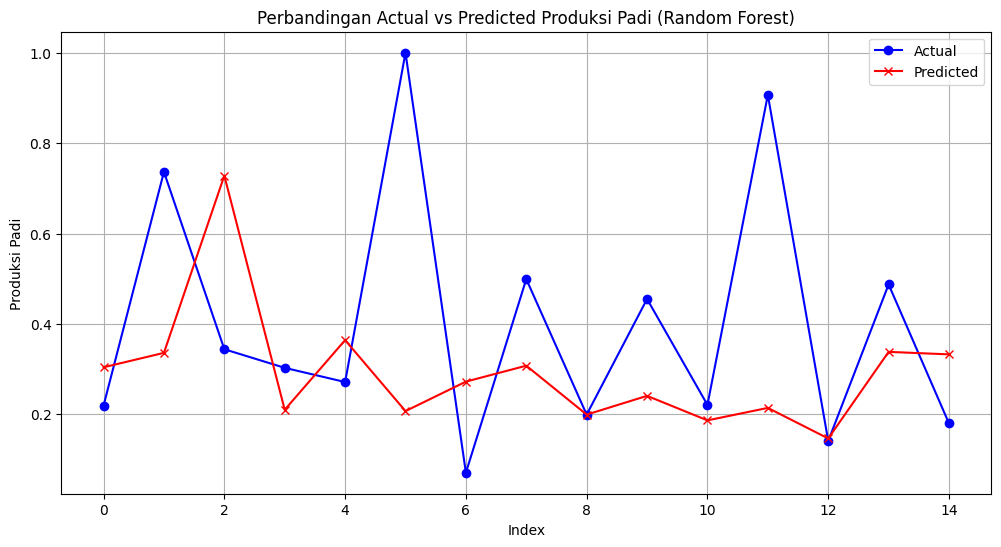

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Inisialisasi dan fit model Random Forest
model_rf = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)  # n_estimators dan max_depth dikurangi
model_rf.fit(X_train, y_train)

# Prediksi pada data test
y_pred_rf = model_rf.predict(X_test)

# Evaluasi performa menggunakan RMSE dan MAPE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print(f"RMSE (Random Forest): {rmse_rf}")
print(f"MAPE (Random Forest): {mape_rf * 100:.2f}%")

# Visualisasi perbandingan antara nilai aktual dan prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", marker='o', color='blue')
plt.plot(y_pred_rf, label="Predicted", marker='x', color='red')
plt.title("Perbandingan Actual vs Predicted Produksi Padi (Random Forest)")
plt.xlabel("Index")
plt.ylabel("Produksi Padi")
plt.legend()
plt.grid(True)
plt.show()


### 2. Linear Regression


Linear Regression

Penjelasan
Linear regression adalah metode statistik yang digunakan untuk memodelkan hubungan antara satu atau lebih variabel independen (\(x\)) dan variabel dependen (\(y\)) dengan menggunakan persamaan garis lurus.

Model regresi linier sederhana dapat dinyatakan sebagai:

$$
y = mx + b
$$

atau dalam bentuk yang lebih umum:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

Komponen:

- \( y \): Variabel dependen (target atau output).
- \( x \): Variabel independen (prediktor atau input).
- \( \beta_0 \): Intersep (nilai \( y \) saat \( x = 0 \)).
- \( \beta_1 \): Koefisien kemiringan (slope) yang menunjukkan seberapa besar \( y \) berubah untuk setiap unit perubahan \( x \).
- \( \epsilon \): Galat (error) atau noise, yaitu deviasi nilai aktual dari nilai prediksi.

Rumus Koefisien
Untuk regresi linier sederhana, koefisien kemiringan (\( \beta_1 \)) dan intersep (\( \beta_0 \)) dapat dihitung dengan rumus berikut:

$$
\beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

Contoh:
Misalkan kita memiliki data berikut:

| \(x\) | \(y\) |
| ----- | ----- |
| 1     | 2     |
| 2     | 3     |
| 3     | 5     |

Langkah 1: Hitung Mean

$$
\bar{x} = \frac{1 + 2 + 3}{3} = 2, \quad \bar{y} = \frac{2 + 3 + 5}{3} = 3.33
$$

Langkah 2: Hitung \(\beta_1\)

$$
\beta_1 = \frac{(1 - 2)(2 - 3.33) + (2 - 2)(3 - 3.33) + (3 - 2)(5 - 3.33)}{(1 - 2)^2 + (2 - 2)^2 + (3 - 2)^2}
$$

$$
\beta_1 = \frac{(-1)(-1.33) + (0)(-0.33) + (1)(1.67)}{1 + 0 + 1}
$$

$$
\beta_1 = \frac{1.33 + 0 + 1.67}{2} = 1.5
$$

Langkah 3: Hitung \(\beta_0\)

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

$$
\beta_0 = 3.33 - (1.5)(2) = 0.33
$$

Hasil:
Persamaan regresi linier:

$$
y = 1.5x + 0.33
$$

Interpretasi:

- Untuk setiap peningkatan \(x\) sebesar 1 unit, \(y\) meningkat sebesar 1.5 unit.
- Saat \(x = 0\), \(y\) diprediksi bernilai 0.33.

---


RMSE (Linear Regression): 0.272465837501742
MAPE (Linear Regression): 57.36%


e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


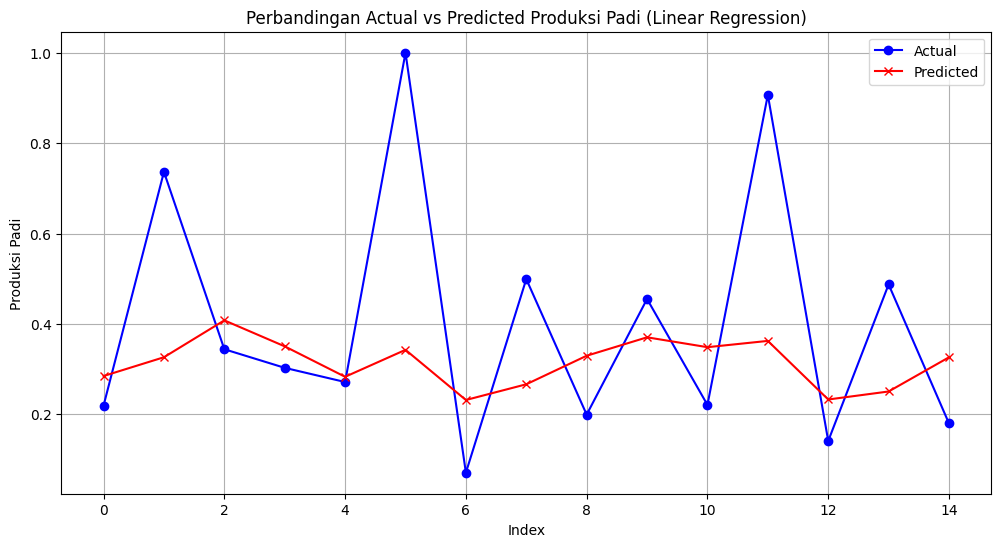

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print(f"RMSE (Linear Regression): {rmse_lr}")
print(f"MAPE (Linear Regression): {mape_lr * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", marker='o', color='blue')
plt.plot(y_pred_lr, label="Predicted", marker='x', color='red')
plt.title("Perbandingan Actual vs Predicted Produksi Padi (Linear Regression)")
plt.xlabel("Index")
plt.ylabel("Produksi Padi")
plt.legend()
plt.grid(True)
plt.show()


### 3. LSTM


Epoch 1/150


e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.1810 - val_loss: 0.2205
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1575 - val_loss: 0.2045
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1376 - val_loss: 0.1891
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1178 - val_loss: 0.1747
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0986 - val_loss: 0.1615
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1103 - val_loss: 0.1492
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0971 - val_loss: 0.1379
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0653 - val_loss: 0.1280
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0707 - val_loss: 0.1190
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0682 - val_loss: 0.1112
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0691 - val_loss: 0.1044
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0633 - val_loss: 0.0993
E

e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


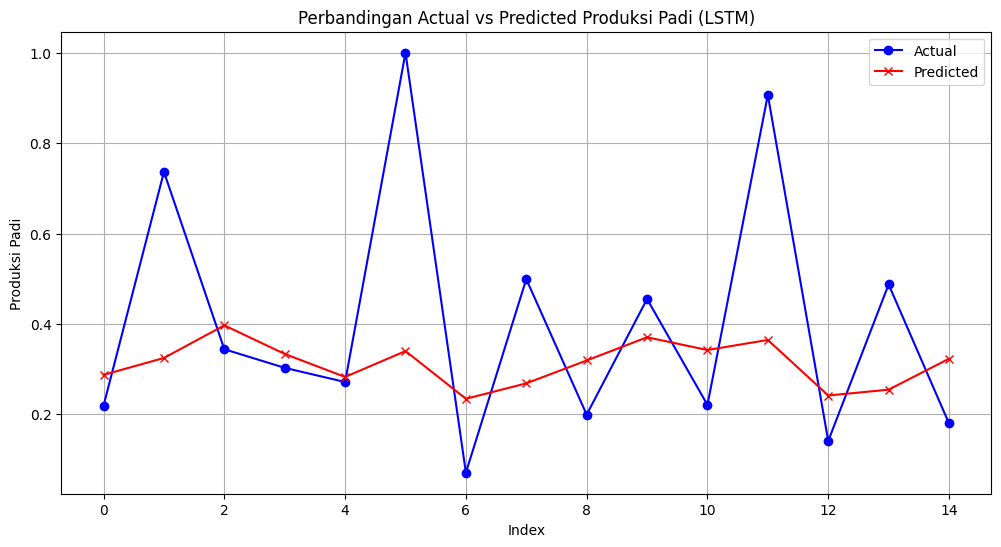

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore
from sklearn.model_selection import train_test_split


X = df_main[['ff_avg', 'Tavg']].values
y = df_main['Produksi'].values

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)


y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)) 


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model_lstm = Sequential()
model_lstm.add(LSTM(units=64, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(units=1))


model_lstm.compile(optimizer='adam', loss='mean_squared_error')


history = model_lstm.fit(X_train_lstm, y_train, epochs=150, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm_scaled = model_lstm.predict(X_test_lstm)

y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))


rmse_lstm = mean_squared_error(y_test_actual, y_pred_lstm, squared=False)
mape_lstm = mean_absolute_percentage_error(y_test_actual, y_pred_lstm)

print(f"RMSE (LSTM): {rmse_lstm}")
print(f"MAPE (LSTM): {mape_lstm * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual", marker='o', color='blue')
plt.plot(y_pred_lstm, label="Predicted", marker='x', color='red')
plt.title("Perbandingan Actual vs Predicted Produksi Padi (LSTM)")
plt.xlabel("Index")
plt.ylabel("Produksi Padi")
plt.legend()
plt.grid(True)
plt.show()


### 4. Ensemble Bagging


In [50]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01)
model_lr = LinearRegression()

ensemble_model = VotingRegressor(estimators=[('rf', model_rf), ('xgb', model_xgb), ('lr', model_lr)])
ensemble_model.fit(X_train, y_train)


y_pred_ensemble = ensemble_model.predict(X_test)
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)
mape_ensemble = mean_absolute_percentage_error(y_test, y_pred_ensemble)

print(f"RMSE (Ensemble): {rmse_ensemble}")
print(f"MAPE (Ensemble): {mape_ensemble * 100:.2f}%")


e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\ensemble\_voting.py:694: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE (Ensemble): 0.32032225874777354
MAPE (Ensemble): 62.20%


e:\apps\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Kesimpulan


## Dikarenakan keterbatasan data untuk prediksi, maka model mengalami overfitting dan tidak bisa memprediksi dengan akurasi tinggi


Maka hasil dari beberapa model sebagai berikut


| Model             | RMSE                | MAPE    |
| ----------------- | ------------------- | ------- |
| Linear            | 0.272465837501742   | 57.36%  |
| LSTM              | 0.2721217160029784  | 57.42%  |
| Random Forest     | 0.3276478251299928  | 62.01%  |
| Ensemnble Bagging | 0.32032225874777354 | 62.20 % |


# Deployement


MOdel terbaik yang diambil Linear Regression


In [51]:
import joblib

# Menyimpan model yang sudah dilatih
joblib.dump(model_lr, 'lr_model.joblib')


['lr_model.joblib']

# Website


https://huggingface.co/spaces/ahmadnoval/PSD-rediksi-produksi-beras
